In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
%matplotlib inline

KeyboardInterrupt: 

In [2]:
df = pd.read_csv('height-weight.csv')

In [3]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
# scatter plot
sns.scatterplot(df,x = 'Weight',y='Height')

<Axes: xlabel='Weight', ylabel='Height'>

In [5]:
sns.heatmap(df)

<Axes: >

In [6]:
df.corr()

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


In [7]:
sns.pairplot(df)

In [8]:
## Independent and dependent features
x = df['Weight'] ## independent features should be data frame or 2 dimensional array
x.head()

0    45
1    58
2    48
3    60
4    70
Name: Weight, dtype: int64

In [9]:
y = df['Height'] # Dependent Features
y.head()

0    120
1    135
2    123
3    145
4    160
Name: Height, dtype: int64

In [10]:
# Train test split

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [11]:
x_train.shape

(17,)

In [12]:
x_test.shape

(6,)

In [18]:
x_train = pd.DataFrame(x_train)
x_train.head()

,Weight
1,58
13,100
5,78
2,48
11,95


In [19]:
x_test = pd.DataFrame(x_test)
x_test.head()

,Weight
15,78
9,78
0,45
8,95
17,65


In [20]:
## Standardization
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
x_train_std = scalar.fit_transform(x_train)
x_test_std = scalar.transform(x_test)

In [22]:
print(x_test_std)

[[ 0.33497168]
 [ 0.33497168]
 [-1.6641678 ]
 [ 1.36483141]
 [-0.45256812]
 [ 1.97063125]]


In [24]:
## Apply linear Regression 
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(x_train_std,y_train)

LinearRegression(n_jobs=-1)

In [ ]:
print('Coefficient or slope:',regression.coef_) # Here output(17.29) says one moment in the weight it leads to 17.29 momemnts in height
print('Intercept:',regression.intercept_)# nothing but when weight value 0 where line meets y_axis

Coefficient or slope: [17.2982057]
Intercept: 156.47058823529412


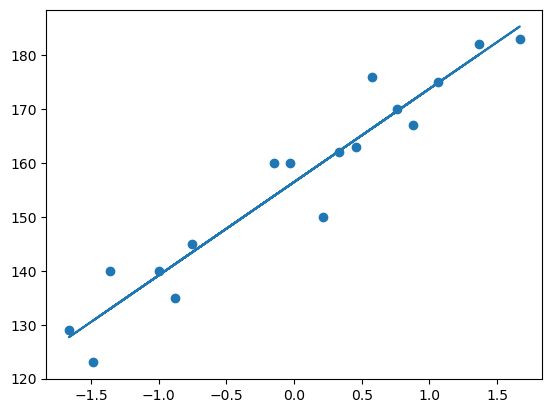

In [34]:
## Plot Training Data plot best fit line
plt.scatter(x_train_std,y_train)
plt.plot(x_train_std,regression.predict(x_train_std))
plt.show()

# Prediction of test data 

#### 1.predicted height output = intercept + coef_(weights)
#### 2.y_pred_test = 65.4364 + 17.29(x_test_std)

In [35]:
## Prediction for test Data

y_pred = regression.predict(x_test_std)

In [ ]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error


In [37]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)



114.84069295228699
9.665125886795005
10.716374991212605


# R_Square 

#### R^2 = 1 - SSR/SST
#### R^2 = coefficient of determination SSR = sum of squares of residuals SSt /Total sum of squares

In [38]:
from sklearn.metrics import r2_score

score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [39]:
# Display Adjusted R-squared

1 - (1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6701033397476595

In [41]:
## OLS Linear Regression
import statsmodels.api as sm

In [42]:
model = sm.OLS(y_train,x_train_std).fit()
model.predict(x_test_std)

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [43]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Mon, 22 Sep 2025   Prob (F-statistic):                       0.664
Time:                        10:34:45   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

c:\Users\chara\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  res = hypotest_fun_out(*samples, **kwds)


In [45]:
## Prediction for new data

regression.predict(scalar.transform([[72]]))

c:\Users\chara\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])